In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import sys
import math



## Data Import

In [8]:
dtype_dict = {'gene':'str', 'Time':'float', 'group': 'str', 'Signal': 'float', 'P-Value': 'float'}
sd_data = pd.read_csv('Swindell_HSR_2.csv', dtype = dtype_dict)
print(sd_data)

        gene  Time    group    Signal  P-Value
0      HsfA2   0.5  Control    142.58    0.031
1      HsfA2   0.5  Control     87.16    0.045
2      HsfA2   1.0  Control     61.35    0.037
3      HsfA2   1.0  Control     32.70    0.429
4      HsfA2   3.0  Control    377.96    0.002
..       ...   ...      ...       ...      ...
379  Hsp90-2   6.0     Heat  10674.17    0.002
380  Hsp90-2  12.0     Heat   9296.95    0.002
381  Hsp90-2  12.0     Heat  10410.46    0.002
382  Hsp90-2  24.0     Heat  11046.33    0.002
383  Hsp90-2  24.0     Heat  14394.03    0.002

[384 rows x 5 columns]


## Data Exploration

In [9]:
sd_data.info()
#sd_data.describe()
#sd_data['gene'] = sd_data['gene'].astype(str)
sd_data['gene'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gene     384 non-null    object 
 1   Time     384 non-null    float64
 2   group    384 non-null    object 
 3   Signal   384 non-null    float64
 4   P-Value  384 non-null    float64
dtypes: float64(3), object(2)
memory usage: 15.1+ KB


array(['HsfA2', 'HsfA1a ', 'HsfA1b', 'HsfB3', 'HsfA1d ', 'HsfB4',
       'HsfA1e', 'HsfB2b', 'HsfB2a', 'HsfB1', 'Hsp90-6', 'Hsp90-4',
       'Hsp90-5', 'Hsp90-7', 'Hsp90-1', 'Hsp90-2'], dtype=object)

In [23]:
HsfA2 = ['HsfA2']
HsfA1 = [ 'HsfA1a ', 'HsfA1b', 'HsfA1e','HsfA1d ']
Hsfb = ['HsfB3', 'HsfB4', 'HsfB2b', 'HsfB2a', 'HsfB1']
Hsp90 = ['Hsp90-6', 'Hsp90-4', 'Hsp90-5', 'Hsp90-7', 'Hsp90-1', 'Hsp90-2']

In [5]:
print(sd_data.dtypes)

gene        object
Time       float64
group       object
Signal     float64
P-Value    float64
dtype: object


In [6]:
A2_control = sd_data[(sd_data['gene'] == 'HsfA2') & (sd_data['group'] == 'Control')]
print(A2_control['Time'])

0      0.5
1      0.5
2      1.0
3      1.0
4      3.0
5      3.0
6      6.0
7      6.0
8     12.0
9     12.0
10    24.0
11    24.0
Name: Time, dtype: float64


In [40]:
def df_process(gene):
    control_df = sd_data[(sd_data['gene'] == gene) & (sd_data['group'] == 'Control')]
    heat_df = sd_data[(sd_data['gene'] == gene) & (sd_data['group'] == 'Heat')]
    # Reset indices
    control_df.reset_index(drop=True, inplace=True)
    heat_df.reset_index(drop=True, inplace=True)

    #print(heat_df['Signal'])
    #print(control_df['Signal'])
    #warnings.filterwarnings("ignore", category='SettingWithCopyWarning')
    heat_df['log2 fc'] = np.log2(heat_df['Signal'] / control_df['Signal'])
    #print(heat_df)
    return control_df, heat_df

## Plotting

In [63]:
HsfA2 = ['HsfA2']
HsfA1 = [ 'HsfA1a ', 'HsfA1b', 'HsfA1e','HsfA1d ']
#Hsfb = ['HsfB3', 'HsfB4', 'HsfB2b', 'HsfB2a', 'HsfB1']
Hsfb = ['HsfB3', 'HsfB4', 'HsfB2b',  'HsfB1']
#Hsp90 = ['Hsp90-6', 'Hsp90-4', 'Hsp90-5', 'Hsp90-7', 'Hsp90-1', 'Hsp90-2']
Hsp90 = ['Hsp90-4', 'Hsp90-5', 'Hsp90-7', 'Hsp90-1']

/tmp/ipykernel_161/1690838126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_df['log2 fc'] = np.log2(heat_df['Signal'] / control_df['Signal'])
/tmp/ipykernel_161/1690838126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_df['log2 fc'] = np.log2(heat_df['Signal'] / control_df['Signal'])
/tmp/ipykernel_161/1690838126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

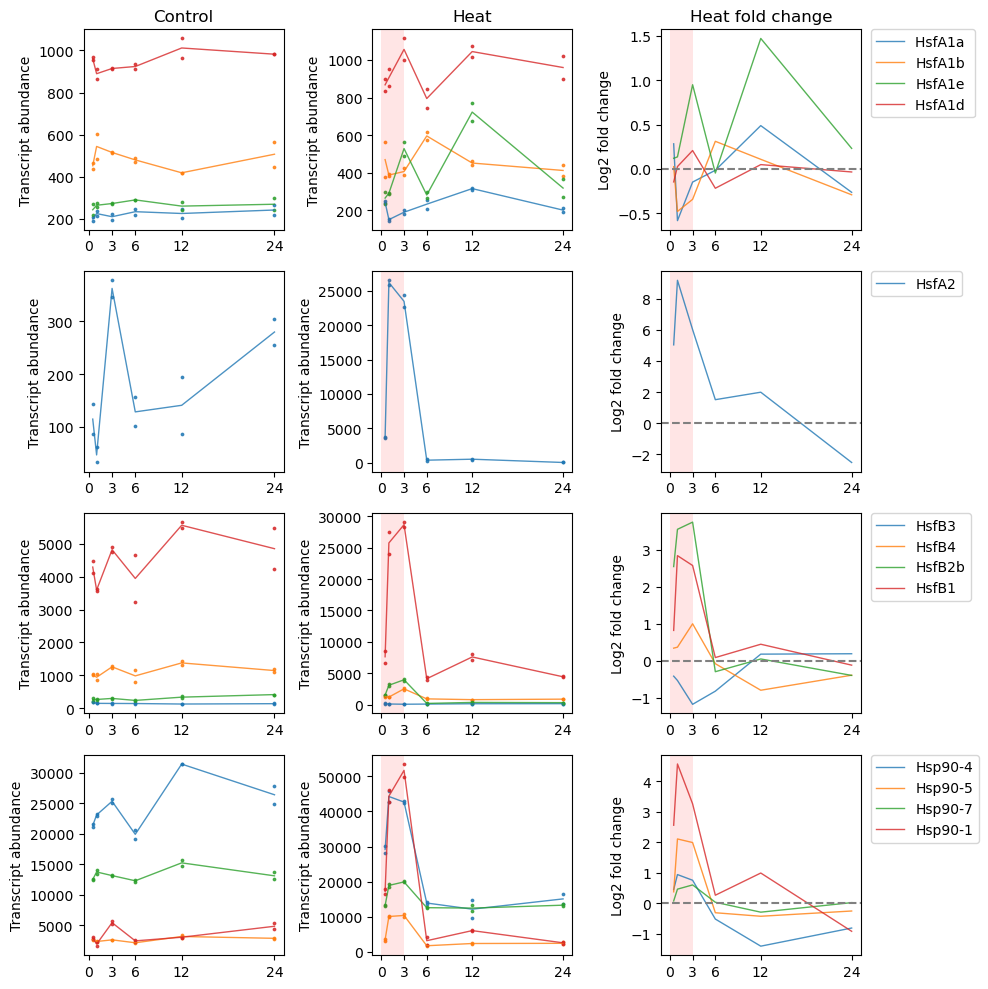

In [71]:
# Define custom tick positions and labels
xticks = [0, 3, 6, 12, 24]
xticklabels = ['0', '3', '6', '12', '24']

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(10, 10))

for i, pro in enumerate([HsfA1, HsfA2, Hsfb, Hsp90]):
    for j, y_col in enumerate(pro):
        control_df, heat_df = df_process(y_col)
        ax[i,0].scatter(control_df['Time'], control_df['Signal'], alpha=0.8, s=3)
        ax[i,0].plot(control_df['Time'].unique(), control_df.groupby('Time')['Signal'].mean(), label=y_col, linewidth=1, alpha=0.8)
        
        ax[i,1].scatter(heat_df['Time'], heat_df['Signal'], alpha=0.8, s=3)
        ax[i,1].plot(heat_df['Time'].unique(), heat_df.groupby('Time')['Signal'].mean(), label=y_col, linewidth=1, alpha=0.8)

        #ax[i,2].scatter(heat_df['Time'], heat_df['log2 fc'], alpha=0.8, s=3)
        ax[i,2].plot(heat_df['Time'].unique(), heat_df.groupby('Time')['log2 fc'].mean(), label=y_col, linewidth=1, alpha=0.8)

    #ax[i,0].set_xlabel('Time (hour) post HS')
    ax[i,0].set_ylabel('Transcript abundance')
    if i == 0: ax[i,0].set_title('Control')
    #ax[i,0].axvspan(0, 3, facecolor='r', alpha=0.1)
    ax[i,0].set_xticks(xticks)
    ax[i,0].set_xticklabels(xticklabels)

    #ax[i,1].set_xlabel('Time (hour) post HS')
    ax[i,1].set_ylabel('Transcript abundance')
    if i == 0: ax[i,1].set_title('Heat')
    ax[i,1].axvspan(0, 3, facecolor='r', alpha=0.1)
    ax[i,1].set_xticks(xticks)
    ax[i,1].set_xticklabels(xticklabels)

    #ax[i,2].set_xlabel('Time (hour) post HS')
    ax[i,2].set_ylabel('Log2 fold change')
    if i == 0: ax[i,2].set_title('Heat fold change')
    ax[i,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[i,2].axvspan(0, 3, facecolor='r', alpha=0.1)
    ax[i,2].axhline(y=0, color='gray', linestyle='--')
    ax[i,2].set_xticks(xticks)
    ax[i,2].set_xticklabels(xticklabels)

plt.tight_layout()
plt.savefig('Swindell_HSR_fc.pdf')
plt.savefig('Swindell_HSR_fc.png', dpi = 300)
plt.show()